# Exploring Terms in the Encyclopaedia Britannica


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

### Functions

In [4]:
def create_graph_df(df):
    num=50
    graph_df = nx.from_pandas_edgelist(df.head(n=num), source='term', target='related_terms', edge_attr=True)
    return graph_df
   

In [5]:
def explore_a_term(term):
    term_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains(term)]
    G = create_graph_df(term_df)
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=8, alpha=1)
    plt.axis('off')
    plt.show()

## We have dataframe with these information



- definition:           Definition of the article
- edition_num:          1,2,3,4,5,6,7,8
- header:               Header of the page's article                                  
- num_article_words:    Number of words per article
- place:                Place where the volume was edited (e.g. Edinburgh)                                    
- related_terms:        Related articles (see X article)  
- source_text_file:     File Path of the XML file from which the article belongs       
- term:                 Article name                            
- term_id_in_page:      Number of article in the page     
- start_page:           Number page in which the article starts 
- end_page:             Number page in which the article ends 
- title:               Title of the Volume
- type_article:            Type of Page [Full Page| Topic| Mix | Articles]                                       
- year:                 Year of the Volume
- volume:               volume (e.g. 1)
- letters:              leters of the volume (A-B)


### 1. Load dataframe from JSON file

In [6]:
df = pd.read_json('./results_NLS/results_eb_1_edition_postprocess_dataframe', orient="index") 

In [9]:
df = df[["term", "definition", "related_terms", "num_article_words", "header", "start_page", "end_page",  "term_id_in_page", "type_article", "edition_num", "volume", "letters", "year", "title",  "place", "source_text_file"  ]]
df

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
0,FIRSTARTICLE,S :u -I >;J .1 M U a C V',[],10,**■*,8,8,0,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808281...
1,PREFACE,"TH E Editors, though fully fen&ble of the prop...",[],410,viPREFACE,12,12,0,Topic,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808286...
10,AATTER,"or AT TER, a province of Arabia Felix, situate...",[],36,EncyclopaediaBritannica,15,15,8,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
100,ABLECTI,"in Roman antiquity, a feleht body of soldiers ...",[],16,ABLABR,19,19,16,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808295...
1000,ALENZON,"a drong city of Normandy, situated under the s...",[],28,ALEALG,111,111,3,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808415...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OVIS,"in zoology, a genus of the mammalia class, and...",[],1890,OVAOVI,522,523,27,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/14481081...
9996,OULNEY,"a market-town of Buckinghamfhire, situated nin...",[],10,OVIous,523,523,1,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/14481082...
9997,OULZ,"a town of Italy, in the province of Piedmont, ...",[],19,OVIous,523,523,2,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/14481082...
9998,OUNCE,"a little weight, the sixteenth part of a pound...",[LEO],23,OVIous,523,523,3,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/14481082...


### 2. Related Terms

### 2.1 Selecting just the volumes 1771

In [10]:
df_1771_vol1 = df[(df['year'] == 1771) & (df['volume'] == 1) ]


### 2.2 Counting the number of terms

**Remember**: A term can appear in more than once  per eddition. 

In [11]:
df_1771_vol1.count()

term                 3856
definition           3856
related_terms        3856
num_article_words    3856
header               3856
start_page           3856
end_page             3856
term_id_in_page      3856
type_article         3856
edition_num          3856
volume               3856
letters              3856
year                 3856
title                3856
place                3856
source_text_file     3856
dtype: int64

**Note**: This means that we have 4204 terms in 1771

### 3. Filtering the terms that have related terms

We are interested to explore the relations between terms, so we are going to filter out all these terms wich do not have related terms

In [12]:
df_related_1771_vol1=df_1771_vol1[df_1771_vol1['related_terms'].apply(lambda x: len(x)) > 0]

We need to "explode" teh column "related_terms", so we have a row, per related term. 

So, lets imagine that we have the term "X" and its related terms are "Y" and "Z". Originally we would a row, in which the related_terms colum value would be ["X", "Y"]. 

After exploding the related_terms colum, now we are going to have two rows with exactly the same information, but in one row, we will have "Y" as the related term, and in another "Z". 

In [13]:
df_related_1771_vol1=df_related_1771_vol1.explode('related_terms')

In [14]:
df_related_1771_vol1

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
14,ABACATUAIA,"in ichthyology, a barbarous name of the zeus v...",ZEUS,19,EncyclopaediaBritannica,15,15,12,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
15,ABAC,"AY, a barbarous name of a species of the pfitt...",PSITTACUS,14,EncyclopaediaBritannica,15,15,13,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
17,ABACISCUS,See ABACUS.,ABACUS,2,EncyclopaediaBritannica,15,15,15,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
31,ABAI,"in botany, a fynonime of the calycanthus prtec...",CALYCANTHUS,22,ABAABB,16,16,8,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808291...
32,ABAISSE,See ABASED.,ABASED,2,ABAABB,16,16,9,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808291...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,BUTTERMILK,"a kind of ferum that remains behind, after the...",PINGUICULA,17,BUTBUT,828,828,7,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809347...
3840,BUTTON,"an article of dress, serving to fallen cloaths...",BUD,193,BUTBUT,828,828,10,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809347...
3840,BUTTON,"an article of dress, serving to fallen cloaths...",BUTTON,193,BUTBUT,828,828,10,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809347...
3846,BUZZARD,"in ornithology, the English name of several sp...",FAUCO,14,BUXBYZ,829,829,6,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809348...


### 4.Creating a graph with the first 20 terms

We are going to select the first 20 elements, and visualize their related terms. 

In [15]:

graph_df = create_graph_df(df_related_1771_vol1)


/anaconda3/envs/mypython3/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/envs/mypython3/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


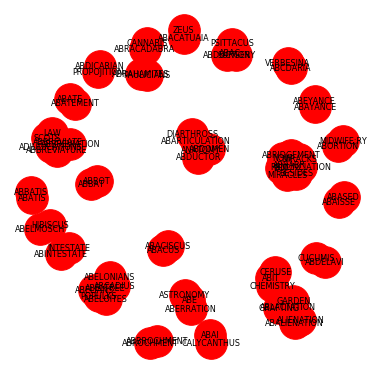

In [17]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(graph_df)
nx.draw(graph_df, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=8, alpha=1)
plt.axis('off')
plt.show()


Here are the 20 terms stored in a list

In [18]:
list_terms= df_related_1771_vol1[["term"]].head(n=50).values.tolist()
list_terms_update=[]
for i in list_terms:
    list_terms_update.append(i[0])
list_terms_update

['ABACATUAIA',
 'ABAC',
 'ABACISCUS',
 'ABAI',
 'ABAISSE',
 'ABALIENATION',
 'ABARTICULATION',
 'ABARTICULATION',
 'ABATEMENT',
 'ABAYANCE',
 'ABBAT',
 'ABBATIS',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBROCHMENT',
 'ABCDARIA',
 'ABDELAVI',
 'ABDICARIAN',
 'ABDOMEN',
 'ABDUCTION',
 'ABDUCTOR',
 'ABELTREE',
 'ABELTREE',
 'ABELTREE',
 'ABELTREE',
 'ABELTREE',
 'ABELMOSCH',
 'ABE',
 'ABE',
 'ABINTESTATE',
 'ABIT',
 'ABIT',
 'ABLACTATION',
 'ABLACTATION',
 'ABORTION',
 'ABRACADABRA',
 'ABRAHAMITES',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR',
 'ABRABR']

And now lets create a network graph for displaying those relationships

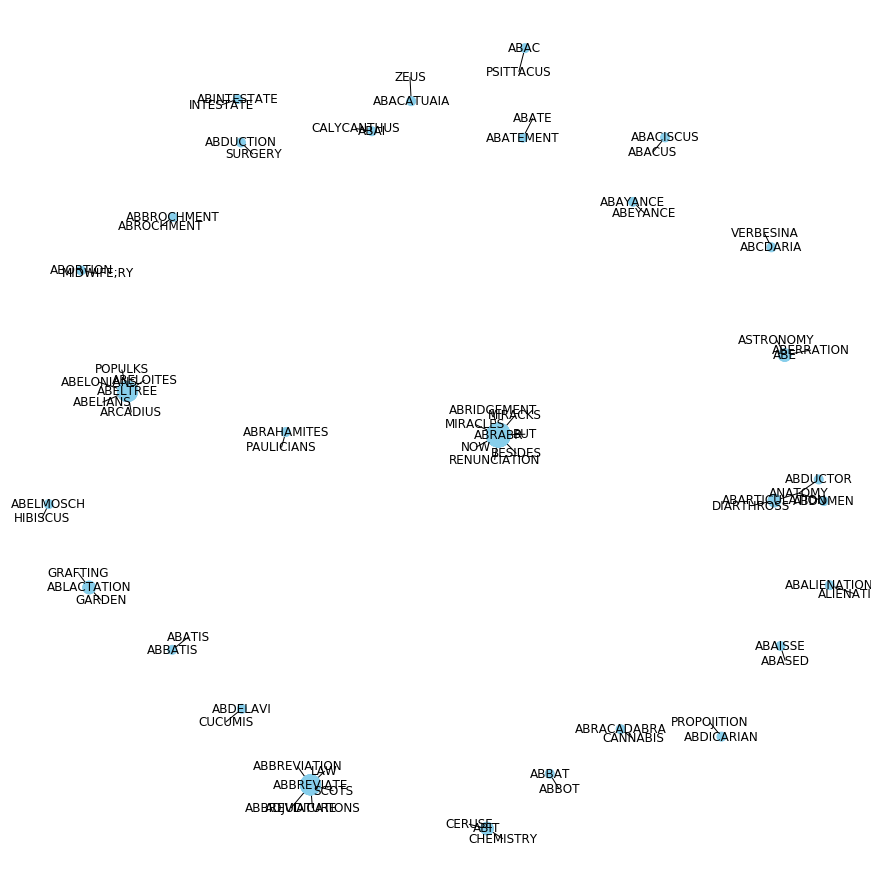

In [19]:
term_size = [graph_df.degree(t) * 80 for t in list_terms_update]

plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, nodelist= list_terms_update, node_size= term_size, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.axis('off')
plt.show()

### 5.Exploring the relations of one term - ABACISCUS

We are going to use the term ABACISCUS, and visualize its related terms in a graph. 

In [20]:
ABACISCUS_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ABACISCUS")]
ABACISCUS_df

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
17,ABACISCUS,See ABACUS.,ABACUS,2,EncyclopaediaBritannica,15,15,15,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...


In [21]:
G = create_graph_df(ABACISCUS_df)

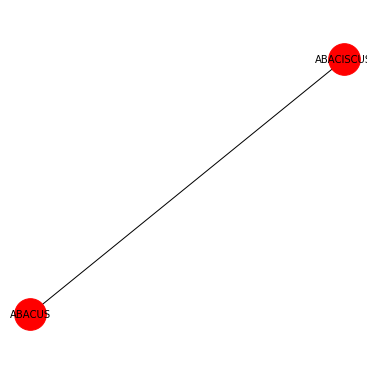

In [22]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=10, alpha=1)
plt.axis('off')
plt.show()

### 5.Exploring the terms with most relations.

Now lets get the 10 terms with most relations. For that, we have to group the dataframe by terms, and create an extra colum, with the count. 

In [28]:
rt=df_related_1771_vol1.groupby(['term']).size().rename('count').reset_index().sort_values(['count'], ascending=False)
rt

,term,count
487,ARCHITECTURE,512
790,BOTANY,424
502,ARITHMETICK,261
371,ANATOMY,235
252,ALGEBRA,165
...,...,...
459,APOLLINARIAN,1
460,APONEUROSIS,1
461,APOPLEXY,1
462,APOSTLE,1


And now lets get the 10 most repeated terms

In [39]:
rt.nlargest(10, 'count')

,term,count
791,BOTANY,161
663,BBTHEEPISTLEOF,101
485,ARCHITECTURE,96
356,ANAI,49
501,ARITHETRGK,48
554,ASTRONOM,45
411,ANNUITIES,30
250,ALGEBRA,18
742,BLEACHING,18
779,BOOKKEEPING,17


Lets select ASTRONOMY term

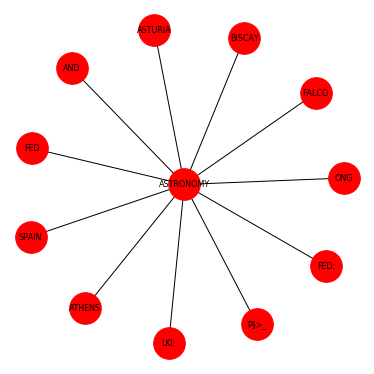

In [29]:
explore_a_term("ASTRONOMY")

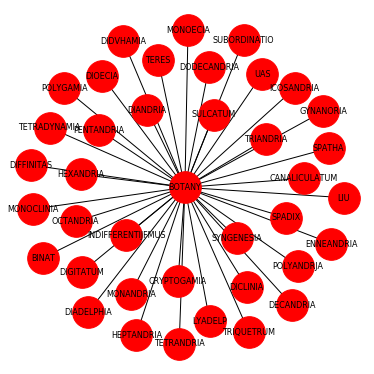

In [30]:
explore_a_term("BOTANY")

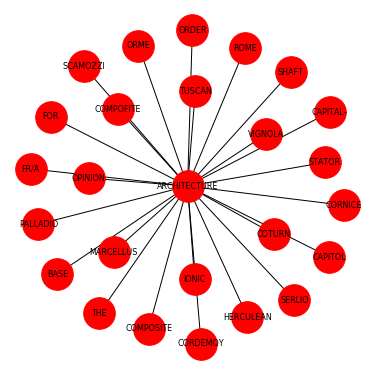

In [31]:
explore_a_term("ARCHITECTURE")

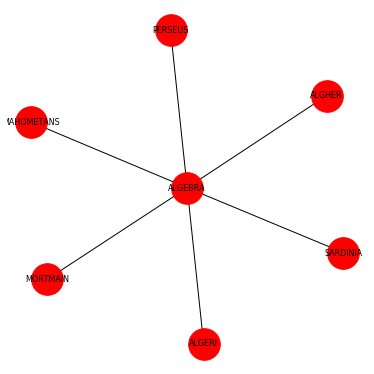

In [32]:
explore_a_term("ALGEBRA")

In [33]:
ABELTREE_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ALGEBRA")]
ABELTREE_df["related_terms"]

1036       PERSEUS
1036        ALGHER
1036        ALGERI
1036      SARDINIA
1036    MAHOMETANS
           ...    
1036        ALGERI
1036      SARDINIA
1036    MAHOMETANS
1036      MORTMAIN
1036      MORTMAIN
Name: related_terms, Length: 165, dtype: object